# Diversificación y fuentes de riesgo en un portafolio II - Una ilustración con mercados internacionales.

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/5/5f/Map_International_Markets.jpg" width="500px" height="300px" />

> Entonces, la clase pasada vimos cómo afecta la correlación entre pares de activos en un portafolio. Dijimos que como un par de activos nunca tienen correlación perfecta, al combinarlos en un portafolio siempre conseguimos diversificación del riesgo.

> Vimos también que no todo el riesgo se puede diversificar. Dos fuentes de riesgo:
> - Sistemático: afecta de igual manera a todos los activos. No se puede diversificar.
> - Idiosincrático: afecta a cada activo en particular por razones específicas. Se puede diversificar.

En esta clase veremos un ejemplo de diversificación en un portafolio, usando datos de mercados de activos internacionales.

En el camino, definiremos términos como *frontera media/varianza*, *portafolio de varianza mínima* y *portafolios eficientes*, los cuales son básicos para la construcción de la **teoría moderna de portafolios**.

Estos portafolios los aprenderemos a obtener formalmente en el siguiente módulo. Por ahora nos bastará con agarrar intuición.

**Objetivo:**
- Ver los beneficios de la diversificación ilustrativamente.
- ¿Qué es la frontera de mínima varianza?
- ¿Qué son el portafolio de varianza mínima y portafolios eficientes?

*Referencia:*
- Notas del curso "Portfolio Selection and Risk Management", Rice University, disponible en Coursera.
___

## 1. Ejemplo

**Los datos:** tenemos el siguiente reporte de rendimientos esperados y volatilidad (anuales) para los mercados de acciones en los países integrantes del $G5$: EU, RU, Francia, Alemania y Japón.

In [1]:
# Importamos pandas y numpy
import pandas as pd
import numpy as np

In [2]:
# Resumen en base anual de rendimientos esperados y volatilidades
annual_ret_summ = pd.DataFrame(columns=['EU', 'RU', 'Francia', 'Alemania', 'Japon'], index=['Media', 'Volatilidad'])
annual_ret_summ.loc['Media'] = np.array([0.1355, 0.1589, 0.1519, 0.1435, 0.1497])
annual_ret_summ.loc['Volatilidad'] = np.array([0.1535, 0.2430, 0.2324, 0.2038, 0.2298])

annual_ret_summ.round(4)

,EU,RU,Francia,Alemania,Japon
Media,0.1355,0.1589,0.1519,0.1435,0.1497
Volatilidad,0.1535,0.243,0.2324,0.2038,0.2298


¿Qué podemos notar?
- Los rendimientos esperados rondan todos por los mismos valores 14%-15%.
- En cuanto al riesgo, la medida de riesgo del mercado de Estados Unidos  es mucho menor respecto a las demás.

Además, tenemos el siguiente reporte de la matriz de correlación:

In [3]:
# Matriz de correlación
corr = pd.DataFrame(data= np.array([[1.0000, 0.5003, 0.4398, 0.3681, 0.2663],
                                    [0.5003, 1.0000, 0.5420, 0.4265, 0.3581],
                                    [0.4398, 0.5420, 1.0000, 0.6032, 0.3923],
                                    [0.3681, 0.4265, 0.6032, 1.0000, 0.3663],
                                    [0.2663, 0.3581, 0.3923, 0.3663, 1.0000]]),
                    columns=annual_ret_summ.columns, index=annual_ret_summ.columns)
corr.round(4)

,EU,RU,Francia,Alemania,Japon
EU,1.0000,0.5003,0.4398,0.3681,0.2663
RU,0.5003,1.0000,0.5420,0.4265,0.3581
Francia,0.4398,0.5420,1.0000,0.6032,0.3923
Alemania,0.3681,0.4265,0.6032,1.0000,0.3663
Japon,0.2663,0.3581,0.3923,0.3663,1.0000


¿Qué se puede observar?
- Los mercados de acciones que presentan la correlación más baja son los de EU y Japón.

Recordar: correlaciones bajas significan una gran oportunidad para diversificación.

### Nos enfocaremos entonces únicamente en dos mercados: EU y Japón

- ¿Cómo construiríamos un portafolio que consiste de los mercados de acciones de EU y Japón?
- ¿Cuáles serían las posibles combinaciones?

#### 1. Supongamos que $w$ es la participación del mercado de EU en nuestro portafolio.
- ¿Cuál es la participación del mercado de Japón entonces?: $1-w$

- Luego, nuestras fórmulas de rendimiento esperado y varianza de portafolios son:

$$E[r_p]=wE[r_{EU}]+(1-w)E[r_J]$$

$$\sigma_p^2=w^2\sigma_{EU}^2+(1-w)^2\sigma_J^2+2w(1-w)\sigma_{EU,J}$$

#### 2. Con lo anterior...
- podemos variar $w$ con pasos pequeños entre $0$ y $1$, y
- calcular el rendimiento esperado y volatilidad para cada valor de $w$.

In [4]:
# Vector de w variando entre 0 y 1 con n pasos
w = np.linspace(0, 1, 30)
# Rendimientos esperados individuales
# Activo1: EU, Activo2:Japon
E1 = annual_ret_summ['EU']['Media']
E2 = annual_ret_summ['Japon']['Media']
# Volatilidades individuales
s1 = annual_ret_summ['EU']['Volatilidad']
s2 = annual_ret_summ['Japon']['Volatilidad']
# Correlacion
r12 = corr['EU']['Japon']

In [5]:
# Crear un DataFrame cuyas columnas sean rendimiento
# y volatilidad del portafolio para cada una de las w
# generadas
portafolios2 = pd.DataFrame(index=w,columns=['Rend','Vol'])
portafolios2.index.name = 'w'
portafolios2.Rend = w*E1+(1-w)*E2
portafolios2.Vol = np.sqrt((w*s1)**2+((1-w)*s2)**2+2*w*(1-w)*r12*s1*s2)
portafolios2.round(4)

,Rend,Vol
w,,
0.000000,0.1497,0.2298
0.034483,0.1492,0.2233
0.068966,0.1487,0.2170
0.103448,0.1482,0.2108
0.137931,0.1477,0.2048
0.172414,0.1473,0.1989
0.206897,0.1468,0.1932
0.241379,0.1463,0.1876
0.275862,0.1458,0.1823


#### 3. Finalmente, 
- cada una de las combinaciones las podemos graficar en el espacio de rendimiento esperado (eje $y$) contra volatilidad (eje $x$).

In [6]:
# Importar matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

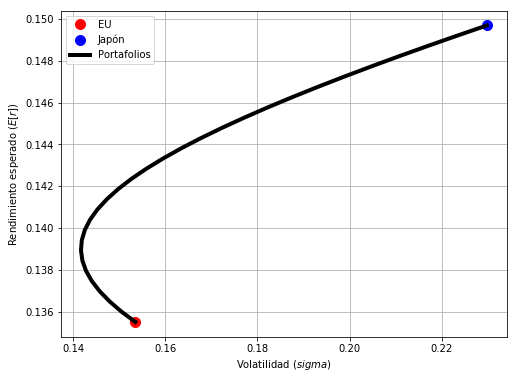

In [12]:
# Graficar el lugar geométrico del portafolio en el
# espacio rendimiento esperado vs. volatilidad.
# Especificar también los puntos relativos a los casos
# extremos.
plt.figure(figsize=(8,6))
plt.plot(s1, E1, 'ro', ms = 10, label='EU')
plt.plot(s2, E2, 'bo', ms = 10, label='Japón')
plt.plot(portafolios2.Vol, portafolios2.Rend, 'k-', lw = 4, label='Portafolios')
plt.xlabel('Volatilidad ($sigma$)')
plt.ylabel('Rendimiento esperado ($E[r]$)')
plt.legend(loc='best')
plt.grid()
plt.show()

#### De la gráfica,
1. Ver casos extremos.
2. ¿Conviene invertir 100% en el mercado de EU? ¿Porqué?
3. ¿Porqué ocurre esto?
4. Definición: frontera de mínima varianza. Caso particular: dos activos.
5. Definición: portafolio de varianza mínima.
6. Definición: portafolios eficientes.

efecto de diversificar: con el mismo riesgo es posible obtener un mayor rendimiento

#### 1. Definición: la frontera de mínima varianza es el lugar geométrico en el espacio de rendimiento esperado vs. volatilidad de los portafolios que para un nivel de rendimiento esperado brindan la mínima varianza posible. En el caso de dos activos, la frontera de mínima varianza corresponde exactamente a todos los portafolios que se pueden generar con estos dos activos.

#### 2. Definición: el portafolio de mínima varianza es el portafolio que está más a la izquierda sobre la frontera de mínima varianza.

#### 3. Definición: los portafolios eficientes son los portafolios que están en la parte superior de la frontera de mínima varianza y a partir del portafolio de mínima varianza.
___

## 2. ¿Cómo hallar el portafolio de varianza mínima?

Bien, esta será nuestra primera selección de portafolio. Si bien se hace de manera básica e intuitiva, nos servirá como introducción al siguiente módulo. 

**Comentario:** estrictamente, el portafolio que está más a la izquierda en la curva de arriba es el de *volatilidad mínima*. Sin embargo, como tanto la volatilidad es una medida siempre positiva, minimizar la volatilidad equivale a minimizar la varianza. Por lo anterior, llamamos a dicho portafolio, el portafolio de *varianza mínima*.

De modo que la búsqueda del portafolio de varianza mínima corresponde a la solución del siguiente problema de optimización:

- Para un portafolio con $n$ activos ($\boldsymbol{w}=[w_1,\dots,w_n]^T\in\mathbb{R}^n$):
\begin{align*}
&\min_{\boldsymbol{w}}\sigma_p^2=\boldsymbol{w}^T\Sigma\boldsymbol{w}\\
&\text{s.t.} \qquad\boldsymbol{w}\geq0,
\end{align*}
donde $\Sigma$ es la matriz de varianza-covarianza de los rendimientos de los $n$ activos.

- En particular, para un portafolio con dos activos el problema anterior se reduce a:
\begin{align*}
&\min_{w_1,w_2}\sigma_p^2=w_1^2\sigma_1^2+w_2^2\sigma_2^2+2w_1w_2\rho_{12}\sigma_1\sigma_2\\
&\text{s.t.} \qquad w_1,w_2\geq0,
\end{align*}
donde $\sigma_1,\sigma_2$ son las volatilidades de los activos individuales y $\rho_{12}$ es la correlación entre los activos. Equivalentemente, haciendo $w_1=w$ y $w_2=1-w$, el problema anterior se puede reescribir de la siguiente manera:
\begin{align*}
&\min_{w}\sigma_p^2=w^2\sigma_1^2+(1-w)^2\sigma_2^2+2w(1-w)\rho_{12}\sigma_1\sigma_2\\
&\text{s.t.} \qquad 0\leq w\leq1,
\end{align*}

1. Los anteriores son problemas de **programación cuadrática** (función convexa sobre dominio convexo: mínimo absoluto asegurado). 
2. Existen diversos algoritmos para problemas de programación cuadrática. Por ejemplo, en la librería cvxopt. Más adelante la instalaremos y la usaremos.
3. En scipy.optimize no hay un algoritmo dedicado a la solución de este tipo de problemas de optimización. Sin embargo, la función mínimize nos permite resolver problemas de optimización en general (es un poco limitada, pero nos sirve por ahora).

### 2.1. Antes de resolver el problema con la función minimize: resolverlo a mano en el tablero.

In [7]:
w_minvar = (s2**2-(r12*s1*s2))/(s1**2+s2**2-2*(r12*s1*s2))
w_minvar

0.7539437814084219

**Conclusiones:**
el portafolio de minima varianza se obtiene al invertir 75.39 de la riqueza en el mercado de EU

### 2.2. Ahora sí, con la función scipy.optimize.minimize

In [8]:
# Importar el módulo optimize
import scipy.optimize as opt

In [9]:
# Función minimize


In [9]:
# Función objetivo
def var2(w,s1,s2,s12):
    return (w*s1)**2+((1-w)*s2)**2+2*w*(1-w)*s12

In [12]:
# Dato inicial
w0=0
# Volatilidades individuales y covarianza
s1=annual_ret_summ['EU']['Volatilidad']
s2=annual_ret_summ['Japon']['Volatilidad']
s12 = corr['EU']['Japon']*s1*s2

# Cota de w
bnd=(0,1)

In [16]:
# Solución
minvar2=opt.minimize(var2,w0,args=(s1,s2,s12),bounds=(bnd,))
minvar2

      fun: array([0.02007595])
 hess_inv: <1x1 LbfgsInvHessProduct with dtype=float64>
      jac: array([-1.11022302e-08])
  message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 6
      nit: 2
   status: 0
  success: True
        x: array([0.75394368])

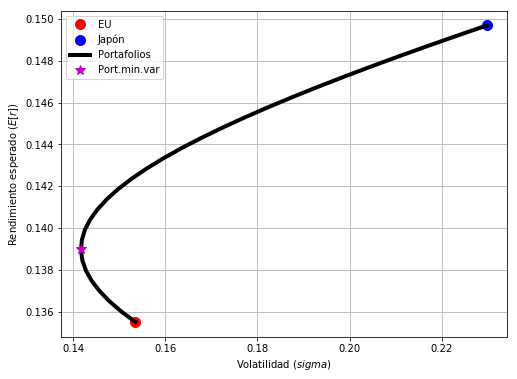

In [21]:
# Graficar el portafolio de varianza mínima
# sobre el mismo gráfico realizado anteriormente

plt.figure(figsize=(8,6))
plt.plot(s1, E1, 'ro', ms = 10, label='EU')
plt.plot(s2, E2, 'bo', ms = 10, label='Japón')
plt.plot(portafolios2.Vol, portafolios2.Rend, 'k-', lw = 4, label='Portafolios')
plt.plot(np.sqrt(minvar2.fun),minvar2.x*E1+(1-minvar2.x)*E2,'*m',ms=10,label='Port.min.var')
plt.xlabel('Volatilidad ($sigma$)')
plt.ylabel('Rendimiento esperado ($E[r]$)')
plt.legend(loc='best')
plt.grid()
plt.show()

___

## 3. Ahora, para tres activos, obtengamos la frontera de mínima varianza

In [22]:
import scipy.optimize as opt

In [23]:
## Construcción de parámetros
## Activo 1: EU, Activo 2: Japon, Activo 3: RU
# 1. Sigma: matriz de varianza-covarianza
s1 = annual_ret_summ['EU']['Volatilidad']
s2 = annual_ret_summ['Japon']['Volatilidad']
s3 = annual_ret_summ['RU']['Volatilidad']
s12 = corr['EU']['Japon']*s1*s2
s13 = corr['EU']['RU']*s1*s3
s23 = corr['Japon']['RU']*s2*s3
Sigma = np.array([[s1**2, s12, s13],
                  [s12, s2**2, s23],
                  [s13, s23, s3**2]])
# 2. Eind: rendimientos esperados activos individuales
E1 = annual_ret_summ['EU']['Media']
E2 = annual_ret_summ['Japon']['Media']
E3 = annual_ret_summ['RU']['Media']
Eind = np.array([E1, E2, E3])
# 3. Ereq: rendimientos requeridos para el portafolio
# Número de portafolios
N = 40
Ereq = np.linspace(Eind.min(), Eind.max(), N)

In [24]:
def varianza(w, Sigma):
    return w.dot(Sigma).dot(w)
def rendimiento_req(w, Eind, Ereq):
    return Eind.dot(w)-Ereq

In [25]:
# Dato inicial
w0 = np.zeros(3,)
# Cotas de las variables
bnds = ((0,None), (0,None), (0,None))

In [26]:
# DataFrame de portafolios de la frontera
portfolios3 = pd.DataFrame(index=range(N), columns=['w1', 'w2', 'w3', 'Ret', 'Vol'])

# Construcción de los N portafolios de la frontera
for i in range(N):
    # Restricciones
    cons = ({'type': 'eq', 'fun': rendimiento_req, 'args': (Eind,Ereq[i])},
            {'type': 'eq', 'fun': lambda w: np.sum(w)-1})
    # Portafolio de mínima varianza para nivel de rendimiento esperado Ereq[i]
    min_var = opt.minimize(varianza, w0, args=(Sigma,), bounds=bnds, constraints=cons)
    # Pesos, rendimientos y volatilidades de los portafolio
    portfolios3.loc[i,['w1','w2','w3']] = min_var.x
    portfolios3['Ret'][i] = rendimiento_req(min_var.x, Eind, Ereq[i])+Ereq[i]
    portfolios3['Vol'][i] = np.sqrt(varianza(min_var.x, Sigma))

In [27]:
# Portafolios de la frontera
portfolios3

,w1,w2,w3,Ret,Vol
0,1,0,1.18787e-10,0.1355,0.1535
1,0.957747,0.0422535,1.11022e-16,0.1361,0.149892
2,0.915493,0.084507,1.11022e-16,0.1367,0.146897
3,0.873239,0.126761,0,0.1373,0.144553
4,0.830986,0.169014,0,0.1379,0.142891
5,0.788732,0.211268,0,0.1385,0.141935
6,0.753702,0.235149,0.0111488,0.1391,0.141635
7,0.725883,0.240689,0.0334281,0.1397,0.141598
8,0.698064,0.246229,0.0557074,0.1403,0.14176
9,0.670245,0.251768,0.0779867,0.1409,0.142119


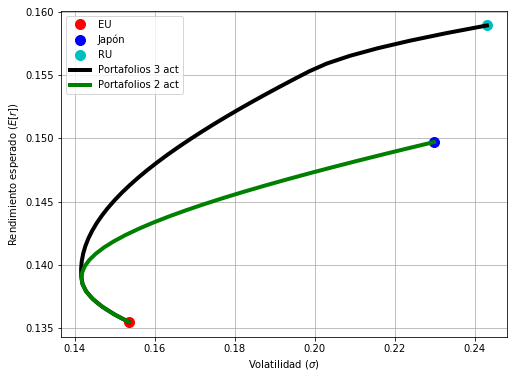

In [32]:
# Graficamos junto a los portafolios de solo EU y Japón
plt.figure(figsize=(8,6))
plt.plot(s1,E1,'ro',ms=10,label='EU')
plt.plot(s2,E2,'bo',ms=10,label='Japón')
plt.plot(s3,E3,'co',ms=10,label='RU')
plt.plot(portfolios3.Vol, portfolios3.Ret, 'k-', lw=4, label='Portafolios 3 act')
plt.plot(portafolios2.Vol, portafolios2.Rend, 'g-', lw = 4, label='Portafolios 2 act')
plt.xlabel('Volatilidad ($\sigma$)')
plt.ylabel('Rendimiento esperado ($E[r]$)')
plt.grid()
#plt.axis([0.14,0.15,0.135,0.142])
plt.legend(loc='best')

**Conclusión.** Mayor diversificación.
___

## 4. Comentarios acerca de la Teoría Moderna de Portafolios.

- Todo lo anterior es un abrebocas de lo que llamamos análisis de media-varianza, y que es la base de la teoría moderna de portafolios.
- El análisis de media-varianza transformó el mundo de las inversiones cuando fué presentada por primera vez.
- Claro, tiene ciertas limitaciones, pero se mantiene como una de las ideas principales en la selección óptima de portafolios.

### Historia.

1. Fue presentada por primera vez por Harry Markowitz en 1950. Acá su [artículo](https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=1&ved=2ahUKEwjd0cOTx8XdAhUVo4MKHcLoBhcQFjAAegQICBAC&url=https%3A%2F%2Fwww.math.ust.hk%2F~maykwok%2Fcourses%2Fma362%2F07F%2Fmarkowitz_JF.pdf&usg=AOvVaw3d29hQoNJVqXvC8zPuixYG).
2. Era un joven estudiante de Doctorado (como yo) en la Universidad de Chicago.
3. Publicó su tesis doctoral en selección de portafolios en "Journal of Finance" en 1952.
4. Su contribución transformó por completo la forma en la que entendemos el riesgo.
5. Básicamente obtuvo una teoría que analiza como los inversionistas deberían escoger de manera óptima sus portafolios, en otras palabras, cómo distribuir la riqueza de manera óptima en diferentes activos.
6. Casi 40 años después, Markowitz ganó el Premio Nobel en economía por esta idea.

- La suposición detrás del análisis media-varianza es que los rendimientos de los activos pueden ser caracterizados por completo por sus rendimientos esperados y volatilidad.
- Por eso es que graficamos activos y sus combinaciones (portafolios) en el espacio de rendimiento esperado contra volatilidad.
- El análisis media-varianza es básicamente acerca de la diversificación: la interacción de activos permite que las ganancias de unos compensen las pérdidas de otros.
- La diversificación reduce el riesgo total mientras combinemos activos imperfectamente correlacionados. 

- En el siguiente módulo revisaremos cómo elegir portafolios óptimos como si los inversionistas sólo se preocuparan por medias y varianzas.
- ¿Qué pasa si un inversionista también se preocupa por otros momentos (asimetría, curtosis...)?
- La belleza del análisis media-varianza es que cuando combinamos activos correlacionados imperfectamente, las varianzas siempre decrecen (no sabemos que pasa con otras medidas de riesgo).
- Si a un inversionista le preocupan otras medidas de riesgo, el análisis media-varianza no es el camino.

- Además, si eres una persona que le gusta el riesgo: quieres encontrar la próxima compañía top que apenas va arrancando (como Google en los 2000) e invertir todo en ella para generar ganancias extraordinarias; entonces la diversificación no es tampoco el camino.
- La diversificación, por definición, elimina el riesgo idiosincrático (de cada compañía), y por tanto elimina estos rendimientos altísimos que brindaría un portafolio altamente concentrado.

# Anuncios parroquiales

## 1. Tarea 4 y Tarea 3 - segunda entrega: varios no entregaron. Para ponernos de acuerdo en este punto, de ahora en adelante: si una de las entregas no se hace, la tarea tiene calificación de 0. Para estos dos casos recientes, como no nos habíamos puesto de acuerdo, abro las entregas de ambas tareas hasta las 2 pm de hoy (supondré, de buena fe, que olvidaron entregarlas y les doy una hora después de la clase para que entreguen).
## 2. Examen módulos 1 y 2 para el miércoles 3 de Octubre.
## 3. Recordar quiz la próxima clase.
## 4. Revisar archivo de la Tarea 5.
## 5. Las próximas dos clases son de repaso, sin embargo, el repaso no lo hago yo, lo hacen ustedes. Estaremos resolviendo todo tipo de dudas que ustedes planteen acerca de lo visto hasta ahora. Si no hay dudas, dedicarán el tiempo de la clase a tareas del curso.
## 6. Tarea 4: tengo la primera entrega calificada para hoy. Segunda entrega para el lunes.
## 7. Fin Módulo 2: revisar Clase0 para ver objetivos.

<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#808080; background:#fff;">
Created with Jupyter by Esteban Jiménez Rodríguez.
</footer>